## Financial data analysis 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True,'font.family': 'serif'})

In [11]:
data = pd.read_csv('./data/SP500_1950_2021.txt', sep="\t")
data['Date'] = pd.to_datetime(data['Date'])

### SP500 index time series

#### 1.1 Daily changes from 1950 to 2021

**1.1** Plot the closing price S_t as a function of the trading day number t for the whole period.

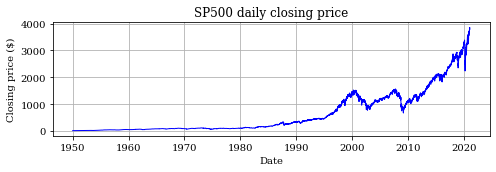

In [12]:
fig, ax = plt.subplots(1,1,figsize=(7,2.5))
ax.plot(data.Date, data.Close, c='b', lw=1)
ax.grid()
ax.set(title="SP500 daily closing price",
       xlabel="Date",
       ylabel="Closing price ($)")
fig.show()
fig.savefig('./img/sp500_closing_prices.pdf')

**1.2** The log return being defined by $g_t=\delta S_t \equiv ln \frac{S_{t+1}}{S_t}$, calculate its mean <g> and standard deviation $\sigma_g$.

In [13]:
logreturn = np.log(data.Close[1:].values/data.Close[:-1].values)
print(f"Mean: {logreturn.mean()}, STD: {logreturn.std()}")

Mean: 0.00030430112089825363, STD: 0.009914784882745397


**1.3** Plot the log return (in $\sigma_g$ unit) as a function of the trading day number $t$. Compare qualitatively with a Gaussian random walk.

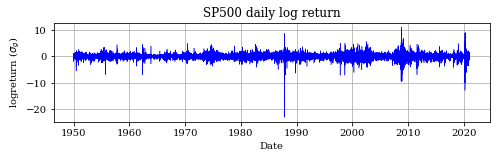

In [14]:
fig, ax = plt.subplots(1,1,figsize=(7,2.3))
ax.plot(data.Date[:-1], logreturn/logreturn.std(), c='b', lw=0.5)
ax.grid()
ax.set(title="SP500 daily log return",
       xlabel="Date",
       ylabel="logreturn ($\sigma_g$)")

fig.show()
fig.savefig('./img/sp500_daily_return.pdf')

**1.4** According to the standard model of asset pricing, the log return should be normally distributed. Plot, in the same Figure, i) the probability distribution function $P(g_t)$ of the log return as a function of $g_t/\sigma_g$ and ii) the normal distribution with mean <g> and deviation $\sigma_g$ found above. Both with linear y-axis and log y-axis.

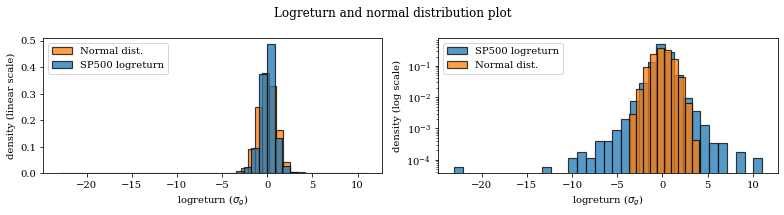

In [15]:
fig, ax = plt.subplots(1,2,figsize=(11,3.0))

# Compute hist and plot the data
#pl_logreturn = logreturn[(logreturn>-0.075) & (logreturn<0.075)]
pl_logreturn = logreturn/logreturn.std()
pl_normal = np.random.normal(logreturn.mean(), 1, logreturn.shape[0])
#pl_normal = pl_normal[(pl_normal>-0.1) & (pl_normal<0.1)]

# Linear axis
ax[0].hist(pl_normal,bins=10, label='Normal dist.', color='tab:orange',edgecolor='black', linewidth=1.2, alpha=0.75, density=True, stacked=True)
ax[0].hist(pl_logreturn,bins=40, label='SP500 logreturn', color='tab:blue', edgecolor='black', linewidth=1.2, alpha=0.75, density=True, stacked=True)

ax[0].legend()
ax[0].set(title="",
       xlabel="logreturn ($\sigma_g$)",
       ylabel="density (linear scale)")

# Log axis
ax[1].hist(pl_logreturn,bins=35, label='SP500 logreturn', color='tab:blue', edgecolor='black', linewidth=1.2, alpha=0.75, density=True, stacked=True)
ax[1].hist(pl_normal,bins=10, label='Normal dist.', color='tab:orange', edgecolor='black', linewidth=1.2, alpha=0.75, density=True, stacked=True)

ax[1].set_yscale("log")
ax[1].legend()
ax[1].set(title="",
       xlabel="logreturn ($\sigma_g$)",
       ylabel="density (log scale)")

fig.tight_layout()
fig.suptitle("Logreturn and normal distribution plot")
fig.subplots_adjust(top=0.90)

fig.show()
fig.savefig('./img/histogram_daily_returns.pdf')

**1.5** Calculate the excess kurtosis $\mathcal{k}$ of $P(g_t)$ and discuss its value.

In [16]:
from scipy.stats import kurtosis
print(kurtosis(logreturn))

# It has high kurtosis which means the distribution has fatter endtails. Therefore the distribution is not
# completely normal and we might argue that the standard model of asset pricing is not completely right.

27.003524171978576


#### Monthly changes from 1950 to 2021

Let's now consider the monthly changes of the index. The time horizon is then $\Delta t=1$ month (1/12 year). In this section we are going to reexamine the previous study by taking only one daily index value out of 22 (there are about 22 trading days in a month). The new time series has 812 data points.

In [17]:
sampled_data = data[1::22]

**1.6** Calculate the mean (g') and standard deviation $\sigma_{g'}$ of the monthly log return.

In [18]:
logreturn_month = np.log(sampled_data.Close[1:].values/sampled_data.Close[:-1].values)
print(f"Mean: {logreturn_month.mean()}, STD: {logreturn_month.std()}")

Mean: 0.006658593396930857, STD: 0.046314747635266176


**1.7** Plot the monthly log return $g_t'$ (in $\sigma_{g'}$ unit) as a function of the trading day number t. Compare qualitatively with a Gaussian random walk and with the daily log return shown in xx.

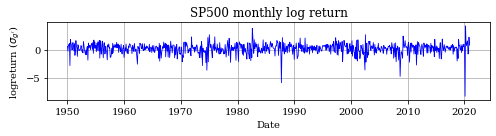

In [19]:
fig, ax = plt.subplots(1,1,figsize=(7,2.0))
ax.plot(sampled_data.Date[:-1], logreturn_month/logreturn_month.std(), c='b', lw=0.8)
ax.grid()
ax.set(title="SP500 monthly log return",
       xlabel="Date",
       ylabel="logreturn ($\sigma_{g'}$)")

fig.show()
fig.savefig('./img/monthly_returns.pdf')

**1.8** Plot, in the same Figure, i) the probability distribution function $P'(g_t')$ of the log return as a function of $g_t'/\sigma_g'$ and ii) the normal distribution with mean $(g')$ and deviation $\sigma_g'$ found above. Use both linear and log y-axis.

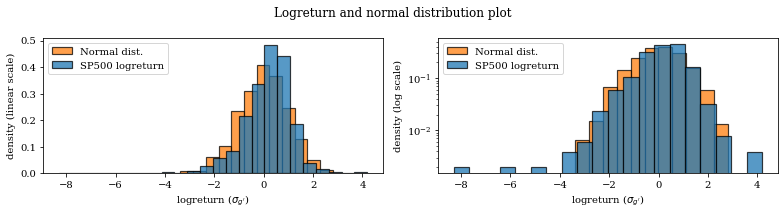

In [20]:
fig, ax = plt.subplots(1,2,figsize=(11,3.0))

# Compute hist and plot the data
#pl_logreturn = logreturn[(logreturn>-0.075) & (logreturn<0.075)]
pl_logreturn = logreturn_month/logreturn_month.std()
pl_normal = np.random.normal(logreturn_month.mean(), 1, logreturn_month.shape[0])
#pl_normal = pl_normal[(pl_normal>-0.1) & (pl_normal<0.1)]

# Linear axis
ax[0].hist(pl_normal,bins=12, label='Normal dist.', color='tab:orange',edgecolor='black', linewidth=1.2, alpha=0.75, density=True, stacked=True)
ax[0].hist(pl_logreturn,bins=24, label='SP500 logreturn', color='tab:blue', edgecolor='black', linewidth=1.2, alpha=0.75, density=True, stacked=True)

ax[0].legend()
ax[0].set(title="",
       xlabel="logreturn ($\sigma_{g'}$)",
       ylabel="density (linear scale)")

# Log axis
ax[1].hist(pl_normal,bins=11, label='Normal dist.', color='tab:orange', edgecolor='black', linewidth=1.2, alpha=0.75, density=True, stacked=True)
ax[1].hist(pl_logreturn,bins=20, label='SP500 logreturn', color='tab:blue', edgecolor='black', linewidth=1.2, alpha=0.75, density=True, stacked=True)

ax[1].set_yscale("log")
ax[1].legend()
ax[1].set(title="",
       xlabel="logreturn ($\sigma_{g'}$)",
       ylabel="density (log scale)")

fig.tight_layout()
fig.suptitle("Logreturn and normal distribution plot")

fig.show()
fig.savefig('./img/histogram_monthly_returns.pdf')

**1.9** Calculate excess kurtosis $k'$ of $P'(g_t')$ and discuss its value.

In [21]:
from scipy.stats import kurtosis
print(kurtosis(logreturn_month))

# It also has high kurtosis but not as much as the daily returns. This makes sense as we increase the sample period we have
# "more information" on each data point and thus it has a more normal behaviour. Still we have many outliers/improbable events
# by normal standards that are happening in this case.

8.753323085738755


**1.10** What conclusions can you draw by comparing the monthly and the daily changes?

In [22]:
# (roughly) explained before

### 2 Time Correlations

The time correlation function of two variables $X_t$ and $Y_t$ is defined as 

$$C_{XY}(t-t')=\frac{\langle X_t Y_t'\rangle-\langle X_t\rangle\langle Y_t'\rangle}{C_{XY}(0)}$$

In the following we consider only the *daily changes* of the SP500 index.

#### 2.1 Autocorrelation of the SP500 index

**2.1** Calculate and plot the autocorrelation function $C_{gg}(t-t')$ of the daily log return $g_t (X_t=g_t \text{ and } Y_{t'}=g_{t'})$ for $t-t'<200$ days. Comment this result.

In [23]:
# 1.Hand-coded solution
def autocorr(g,l):
    return sum([(g[i]-np.mean(g))*(g[i+l]-np.mean(g)) for i in range(1,len(g)-l)])
run = False
if run:
    result = list()
    for i in range(150):
        result.append(autocorr(logreturn, i))

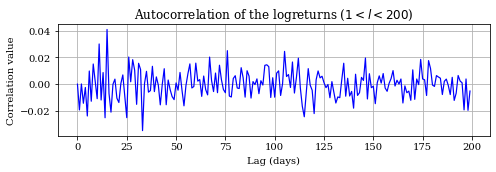

In [24]:
# 2.Numpy convolve/correlate function
#autocorr = np.correlate(logreturn,logreturn, mode='full')[logreturn.shape[0]-1:logreturn.shape[0]+200]
demean_logreturn = logreturn - np.mean(logreturn)
autocorr = np.convolve(demean_logreturn,demean_logreturn[::-1], mode='full')
middle = logreturn.shape[0]

data_plot = autocorr[middle:middle+200]/autocorr[middle-1]

fig, ax = plt.subplots(1,1,figsize=(7,2.5))
ax.plot(data_plot, c='b', lw=1.2)
ax.grid()
ax.set(title="Autocorrelation of the logreturns ($1<l<200$)",
       xlabel="Lag (days)",
       ylabel="Correlation value")

fig.show()
fig.savefig('./img/autocorr_logreturns.pdf')

**2.2** To better understand the index change dynamics let's write
$$g_t=sign(g_t)\cdot|g_t|$$
where $sign(g_t)=\pm1$ is the sign of the sign of the daily log return $g_t$ and $|g_t|$ its amplitude. Calculate and plot the autocorrelation functions $C_{sign(g)sign(g)}(t-t')$ and $C_{|g||g|}(t-t')$ of the sign and of the amplitude respectively of the daily log return $g_t$ for $t-t'<200$ days on the same Figure. Discuss the behavior of these two functions. Show that $C_{|g||g|}(t-t')$ can be fitted with a power law $(t-t')^{-\alpha}$, in this time window. Estimate $\alpha>0$. 

In [25]:
logreturn_sign = np.sign(logreturn)

demean_logreturn_sign = logreturn_sign - np.mean(logreturn_sign)

autocorr_sign = np.convolve(demean_logreturn_sign,demean_logreturn_sign[::-1], mode='full')
middle = logreturn_sign.shape[0]

plot_sign = autocorr_sign[middle:middle+200]/autocorr_sign[middle-1]

In [26]:
logreturn_abs = np.abs(logreturn)

demean_logreturn_abs = logreturn_abs - np.mean(logreturn_abs)

autocorr_abs = np.convolve(demean_logreturn_abs,demean_logreturn_abs[::-1], mode='full')
middle = logreturn_abs.shape[0]

plot_abs = autocorr_abs[middle:middle+200]/autocorr_abs[middle-1]

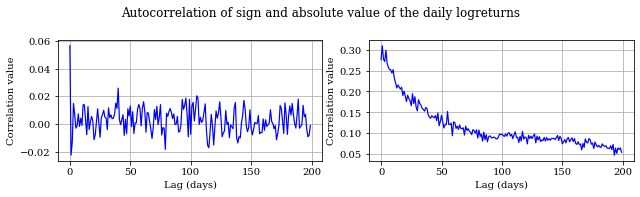

In [27]:
fig, ax = plt.subplots(1,2,figsize=(9,2.75))

# Linear axis
ax[0].plot(plot_sign, label='Normal dist.', color='blue', linewidth=1.2, alpha=1.0)
ax[0].grid()
ax[0].set(title="",
       xlabel="Lag (days)",
       ylabel="Correlation value")

# Log axis
ax[1].plot(plot_abs, label='Normal dist.', color='blue', linewidth=1.2, alpha=1.0)
ax[1].grid()
ax[1].set(title="",
       xlabel="Lag (days)",
       ylabel="Correlation value")

fig.tight_layout()
fig.suptitle("Autocorrelation of sign and absolute value of the daily logreturns")
fig.subplots_adjust(top=0.90)

fig.show()
fig.savefig('./img/autocorr_sign_abs_logreturns.pdf')

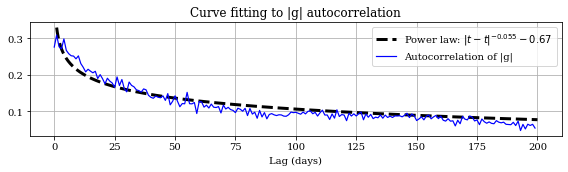

In [28]:
fig, ax = plt.subplots(1,1,figsize=(8,2.5))

lag = np.linspace(1,200,2000)
curve = lag**-0.055-0.67

ax.plot(lag, curve, label='Power law: $|t-t|^{-0.055}-0.67$', color='black', lw=3.0, linestyle='dashed')
ax.plot(plot_abs, label='Autocorrelation of |g|', color='blue', linewidth=1.2, alpha=1.0)

ax.grid()
ax.legend()
ax.set(title="Curve fitting to |g| autocorrelation",
       xlabel="Lag (days)",
       ylabel="")

fig.show()
fig.savefig('./img/curve_fitting_abs.pdf')

**2.3** Calculate and plot the autocorrelation function $C_{g^2g^2}(t-t')$ of the daily log return squared $g^2_t$ for $t-t'<200$ days. Estimate the exponent $\beta>0$ of the power law decay of this autocorrelation function. What conclusion can you draw about the volatility of the index?

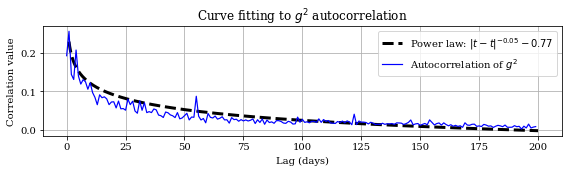

In [29]:
logreturn_sq = logreturn*logreturn

demean_logreturn_sq = logreturn_sq - np.mean(logreturn_sq)

autocorr_sq = np.convolve(demean_logreturn_sq, demean_logreturn_sq[::-1], mode='full')
middle = logreturn_sq.shape[0]

plot_sq = autocorr_sq[middle:middle+200]/autocorr_sq[middle-1]

fig, ax = plt.subplots(1,1,figsize=(8,2.5))

lag = np.linspace(1,200,2000)
curve = lag**-0.05-0.77

ax.plot(lag, curve, label='Power law: $|t-t|^{-0.05}-0.77$', color='black', lw=3.0, linestyle='dashed')
ax.plot(plot_sq, label='Autocorrelation of $g^2$', color='blue', linewidth=1.2, alpha=1.0)

ax.grid()
ax.legend()
ax.set(title="Curve fitting to $g^2$ autocorrelation",
       xlabel="Lag (days)",
       ylabel="Correlation value")

fig.show()
fig.savefig('./img/curve_fitting_gsq.pdf')

#### The leverage effect

Let's define the leverage correlation function by

$$L(t-t')=\frac{\langle(g_t)^2g_{t'}\rangle}{\langle(g_t)^2\rangle^2}$$

where $g_t$ is the daily log return.

**2.4** Calculate and plot $L(t-t')$ for $t-t'<0$ as a function of $|t-t'|<200$. What can you conclude about the correlation between the past volatility at $t$ and the future return at $t'$?

In [30]:
leverage = np.convolve(logreturn**2,logreturn[::-1], mode='full')/np.mean(logreturn**2)**2
middle = leverage.shape[0]

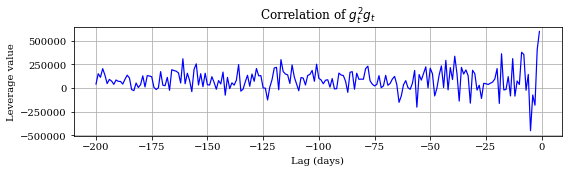

In [31]:
xrange, plot_leverage = np.arange(-200,0),leverage[middle//2-200:middle//2+0]

fig, ax = plt.subplots(1,1,figsize=(8,2.5))

ax.plot(xrange, plot_leverage, label='Correlation of $g^2_tg_t$', color='blue', linewidth=1.2, alpha=1.0)

ax.grid()
ax.set(title="Correlation of $g^2_tg_t$",
       xlabel="Lag (days)",
       ylabel="Leverage value")

fig.show()
fig.savefig('./img/autocorr_leverage.pdf')

**2.5** Calculate and plot $\mathcal{L}(t-t')$ for $t-t'>0$ as a function of $t-t'<200$. Show that the curve can be fitted by $-Ae^{\frac{-(t-t')}{\tau}}$. Estimate $A>0$ and $\tau>0$ and draw your own conclusions.

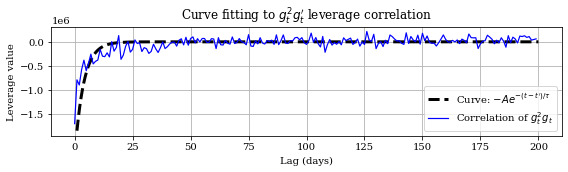

In [32]:
plot_leverage = leverage[middle//2:middle//2+200]

fig, ax = plt.subplots(1,1,figsize=(8,2.5))

lag = np.linspace(1,200,2000)
curve = -2.4e6*np.e**(-lag/3.8)

ax.plot(lag, curve, label="Curve: $-Ae^{-(t-t')/\\tau}}$", color='black', lw=3.0, linestyle='dashed')
ax.plot(plot_leverage, label='Correlation of $g^2_tg_t$', color='blue', linewidth=1.2, alpha=1.0)

ax.grid()
ax.legend()
ax.set(title="Curve fitting to $g^2_tg_t'$ leverage correlation",
       xlabel="Lag (days)",
       ylabel="Leverage value")

fig.show()
fig.savefig('./img/curve_fitting_leverage.pdf')

### 3.Other questions

**Match inflation data to daily price**

In [33]:
# Read monthly inflation figures
inflation = pd.read_csv('./data/cpiai_csv.txt')
inflation['Date'] = pd.to_datetime(inflation['Date'])

In [34]:
# Merge both datasets (sp500 and )
inflation['merge_date'] = inflation['Date'].dt.strftime('%Y-%m')
data['merge_date'] = data['Date'].dt.strftime('%Y-%m')

full_df = pd.merge(data[::22], inflation, on='merge_date')

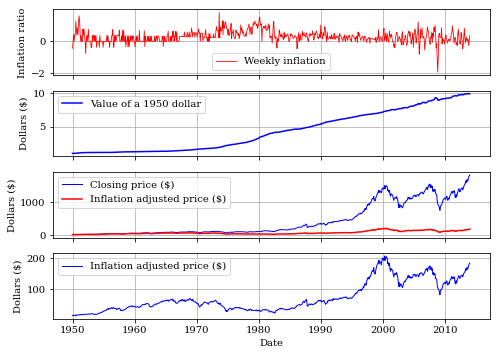

In [35]:
fig, ax = plt.subplots(4,1,figsize=(7,5), sharex=True)

# Monthly inflation
ax[0].plot(full_df.Date_x,full_df.Inflation, c='r', lw=0.8, label='Weekly inflation')
#ax2.set_ylim(-3,3)
ax[0].set(title="",
       xlabel="",
       ylabel="Inflation ratio")
ax[0].legend()
ax[0].grid()

# 1$ dollar value
ax[1].plot(full_df.Date_x,full_df.Index/full_df.Index[0], c='b', lw=1.5, label='Value of a 1950 dollar')
ax[1].grid()
ax[1].set(title="",
       xlabel="",
       ylabel="Dollars ($)")
ax[1].legend()

# Closing price
ax[2].plot(full_df.Date_x,full_df.Close, c='b', lw=1, label="Closing price ($)")
ax[2].plot(full_df.Date_x, full_df.Close/(full_df.Index/full_df.Index[0]), c='r', lw=1.5, label="Inflation adjusted price ($)")
ax[2].grid()
ax[2].set(title="",
       xlabel="",
       ylabel="Dollars ($)")
ax[2].legend()

# Closing price 2
ax[3].plot(full_df.Date_x, full_df.Close/(full_df.Index/full_df.Index[0]), c='b', lw=1, label="Inflation adjusted price ($)")
ax[3].grid()
ax[3].set(title="",
       xlabel="Date",
       ylabel="Dollars ($)")

ax[3].legend()

fig.show()
fig.savefig('./img/inflation_analysis.pdf')

**Market trends detector and compute returns**

In [36]:
dates = data.Date[::] 
close = data.Close[::]

In [37]:
# First take a moving average of the data
N = 80
running_avg = np.convolve(close, np.ones(N)/N, mode='valid')

In [38]:
# Compute gradient to know direction
grad = np.gradient(running_avg)

In [39]:
# Moving average filter on the gradient (not sure if needed)
N=80
deriv_running_avg = np.convolve(grad, np.ones(N)/N, mode='valid')

In [45]:
# In this section we do
# - Compute beggining and ending of the growth/decrease periods
# - Create the Rectangle (patches) for the graph

from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

curr, count, sign = 0,0,0 # 0 for - 1 for +

decreases, increases = list(), list()
inc_period, dec_period = list(), list()

for ix, val in enumerate(deriv_running_avg):
    if val>0: # increase
        # Is it a change?
        if sign == 0: # Is a change
            count += 1
            sign = 1
            lasted = ix-curr
            print(f"Decrease, ({curr},{ix})->{lasted}")
            dec_period.append((curr,ix))
            decreases.append(Rectangle((curr, 0), lasted, 4000))
            curr = ix
    else: # decrease
        # Is it a change?
        if sign == 1: # Is a change
            count += 1
            sign = 0
            lasted = ix-curr
            print(f"Increase, ({curr},{ix})->{lasted}")
            inc_period.append((curr,ix))
            increases.append(Rectangle((curr, 0), lasted, 4000))
            curr = ix

print(f"Number of jumps: {count}")

Decrease, (0,0)->0
Increase, (0,689)->689
Decrease, (689,844)->155
Increase, (844,1565)->721
Decrease, (1565,1710)->145
Increase, (1710,1794)->84
Decrease, (1794,1924)->130
Increase, (1924,2321)->397
Decrease, (2321,2513)->192
Increase, (2513,2551)->38
Decrease, (2551,2621)->70
Increase, (2621,2935)->314
Decrease, (2935,3095)->160
Increase, (3095,3765)->670
Decrease, (3765,3812)->47
Increase, (3812,3945)->133
Decrease, (3945,4137)->192
Increase, (4137,4391)->254
Decrease, (4391,4475)->84
Increase, (4475,4655)->180
Decrease, (4655,5050)->395
Increase, (5050,5261)->211
Decrease, (5261,5376)->115
Increase, (5376,5684)->308
Decrease, (5684,6148)->464
Increase, (6148,6308)->160
Decrease, (6308,6365)->57
Increase, (6365,6619)->254
Decrease, (6619,6969)->350
Increase, (6969,7108)->139
Decrease, (7108,7186)->78
Increase, (7186,7474)->288
Decrease, (7474,7507)->33
Increase, (7507,7703)->196
Decrease, (7703,7733)->30
Increase, (7733,7763)->30
Decrease, (7763,8067)->304
Increase, (8067,8399)->332

<ipython-input-46-580146c24e18>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([22, 1950,1960,1970,1980,1990,2000,2010,2020])


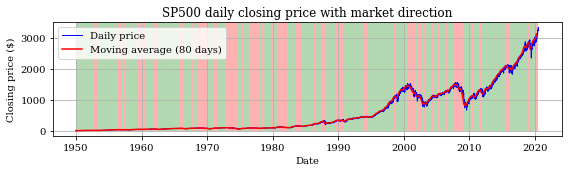

In [46]:
fig, ax = plt.subplots(1,1,figsize=(8,2.5))

ax.plot(close[:-250:], c='b', lw=1, label='Daily price')
ax.plot(running_avg[:-250:], c='r', lw=1.5, label='Moving average (80 days)')

ax.legend()

ax.grid()
ax.set(title="SP500 daily closing price with market direction",
       xlabel="Date",
       ylabel="Closing price ($)")

# Add the rectangles
inc = PatchCollection(increases, facecolor="green", alpha=0.3)
dec = PatchCollection(decreases, facecolor="red", alpha=0.3)
ax.add_collection(inc)
ax.add_collection(dec)

# Hacky way to get custom labels. If plotting with dates the patches don't appear at correct place
ax.set_xticklabels([22, 1950,1960,1970,1980,1990,2000,2010,2020])


fig.show()
fig.savefig('./img/sp500_closing_prices_trend.pdf')

In [48]:
increase = [running_avg[period[1]]/running_avg[period[0]] for period in inc_period]
decrease = [running_avg[period[1]]/running_avg[period[0]]-0.01 for period in dec_period]
print(f"The increase is {np.prod(increase)} and the decrease is {np.prod(decrease)}")

The increase is 2659.3993277138234 and the decrease is 0.041875398870247986


In [ ]:
S